# Figures for discrete outcome docs

Banished to this notebook to prevent huge swathes of code in the main docs.

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import stroke_outcome.outcome_utilities as outcome_utilities

## Setup

### Shared variables

In [141]:
# Create no-effect arrays:
ivt_time_no_effect_mins = 6.3 * 60
mt_time_no_effect_mins = 8 * 60

In [142]:
# Store utility weightings for mRS 0-6
utility_weights = np.array([0.97, 0.88, 0.74, 0.55, 0.20, -0.19, 0.00])

In [143]:
colour_list = [
    "#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9",
    "DarkSlateGray"  # mRS=6
    ]

In [144]:
patient_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

### mRS distributions

In [145]:
input_mrs_dists, mrs_dists_notes = (
    outcome_utilities.import_mrs_dists_from_file())

In [146]:
input_mrs_dists

,mRS<=0,mRS<=1,mRS<=2,mRS<=3,mRS<=4,mRS<=5,mRS<=6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.402850,0.540662,0.654829,0.813128,0.922807,0.964000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


In [147]:
mrs_dist_names = list(input_mrs_dists.index)

In [148]:
def convert_cumulative_probs_to_mean_mRS_and_utility(cum_dist):
    cum_dist = np.append(0.0, cum_dist)
    vals = np.diff(cum_dist)
    mean_mRS = np.sum(vals * np.arange(7))
    mean_utility = np.sum(vals * utility_weights)
    return mean_mRS, mean_utility

In [149]:
input_mrs_dist_means = dict()
for dist_name in input_mrs_dists.index:
    mean_mrs, mean_utility = \
        convert_cumulative_probs_to_mean_mRS_and_utility(
            input_mrs_dists.loc[dist_name]
            )
    input_mrs_dist_means['mean_mrs_' + dist_name] = mean_mrs
    input_mrs_dist_means['mean_utility_' + dist_name] = mean_utility

## Plot mRS dists

In [150]:
def plot_bars_and_means(
        axs,
        mrs_dists, labels, mean_mrs_list=[], mean_utility_list=[],  
        mean_mrs_shift_list=[],
        mean_utility_shift_list=[],
        ):
    axis_vals = []
    axis_labels = []

    # fig, axs = plt.subplots(1, 5, figsize=(8, 5), gridspec_kw={'width_ratios':[3.0, 1.5, 0.1, 0.1, 0.1]})#, 'wspace':0.05})
    ax = axs[0]
    ax1 = axs[1]
    # ax_cbar_mrs = axs[2]
    # axs[3].set_visible(False)  # sneaky old gap
    # ax_cbar_utility = axs[4]

    titles = ['nLVO + IVT', 'LVO + IVT', 'LVO + MT']
    t = 0
    
    y = 0
    for i, dist_name in enumerate(labels):
        if t % 5 == 0:
            ax.annotate(titles[t // 5], xy=(0.5, y+0.5), ha='center', va='bottom', fontsize=14)
        
        dist = mrs_dists[i]
        cum_vals = np.append(0.0, dist)
        vals = np.diff(cum_vals)

        axis_vals.append(y)
        axis_labels.append(dist_name)
        for v in range(len(vals)):
            label = '' if i > 0 else f'{v}'
            ax.barh(
                y,
                vals[v],
                color=colour_list[v],
                edgecolor='k',
                left=cum_vals[v],
                # height=0.4,
                label=label
                )
            
        xleft = 1.1
        if len(mean_mrs_list) > 0:
            ax1.annotate(f'{mean_mrs_list[i]:.2f}', xy=(xleft+0.06, y), ha='left', va='center')
            if i == 0:
                ax1.annotate('Mean mRS', xy=(xleft, 1.0), ha='left')
            
            
        if len(mean_mrs_shift_list) > 0:
            xleft += 0.3
            ax1.annotate(f'{mean_mrs_shift_list[i]:.2f}', xy=(xleft, y), ha='left', va='center')
        
            if i == 0:
                ax1.annotate('shift', xy=(xleft, 1.0), ha='left')
        
        if len(mean_utility_list) > 0:
            xleft += 0.3
            ax1.annotate(f'{mean_utility_list[i]:.2f}', xy=(xleft+0.06, y), ha='left', va='center')
            if i == 0:
                ax1.annotate('Mean utility', xy=(xleft, 1.0), ha='left')
            
        
        if len(mean_utility_shift_list) > 0:
            xleft += 0.3
            ax1.annotate(f'{mean_utility_shift_list[i]:.2f}', xy=(xleft, y), ha='left', va='center')

            if i == 0:
                ax1.annotate('shift', xy=(xleft, 1.0), ha='left')

        # Iterate for next row
        y -= 1
        t += 1
        if 'No treatment' in dist_name:
            y -= 2  # Leave a gap


    if len(mean_mrs_shift_list) > 0:
        ax1.hlines(y+0.5, 1.4, 1.5, color='k')
        ax1.annotate('Mean shift:', xy=(1.1, y), ha='left', va='center')
        ax1.annotate(f'{np.nanmean(mean_mrs_shift_list):.2f}', xy=(1.4, y), ha='left', va='center')
    if len(mean_utility_shift_list) > 0:
        ax1.hlines(y+0.5, 2.0, 2.1, color='k')
        ax1.annotate('Mean shift:', xy=(1.7, y), ha='left', va='center')
        ax1.annotate(f'{np.nanmean(mean_utility_shift_list):.2f}', xy=(2.0, y), ha='left', va='center')

    ax.set_yticks(axis_vals)
    ax.set_yticklabels(axis_labels)
    ax.set_ylim(axis_vals[-1]-2, axis_vals[0]+1)
    ax.set_xlabel('Cumulative probability')
    for spine in ['top', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(-0.02, 1.02)  # To stop bar outlines being cut off
    ax.legend(ncol=7, bbox_to_anchor=(1.05, 1.2), title='mRS')
    

    for spine in ['top', 'bottom', 'left', 'right']:
        ax1.spines[spine].set_visible(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_ylim(ax.get_ylim())
    ax1.set_xlim(1.05, xleft+0.1)

    return fig

In [151]:
input_mrs_dist_names_for_bars = [
    'pre_stroke_nlvo',
    'pre_stroke_nlvo_ivt_deaths',
    't0_treatment_nlvo_ivt',
    'no_effect_nlvo_ivt_deaths',
    'no_treatment_nlvo',
    'pre_stroke_lvo',
    'pre_stroke_lvo_ivt_deaths',
    't0_treatment_lvo_ivt',
    'no_effect_lvo_ivt_deaths',
    'no_treatment_lvo',
    'pre_stroke_lvo',
    'pre_stroke_lvo_mt_deaths',
    't0_treatment_lvo_mt',
    'no_effect_lvo_mt_deaths',
    'no_treatment_lvo',
]

In [152]:
mrs_dists = [input_mrs_dists.loc[dist_name].tolist() for dist_name in input_mrs_dist_names_for_bars]

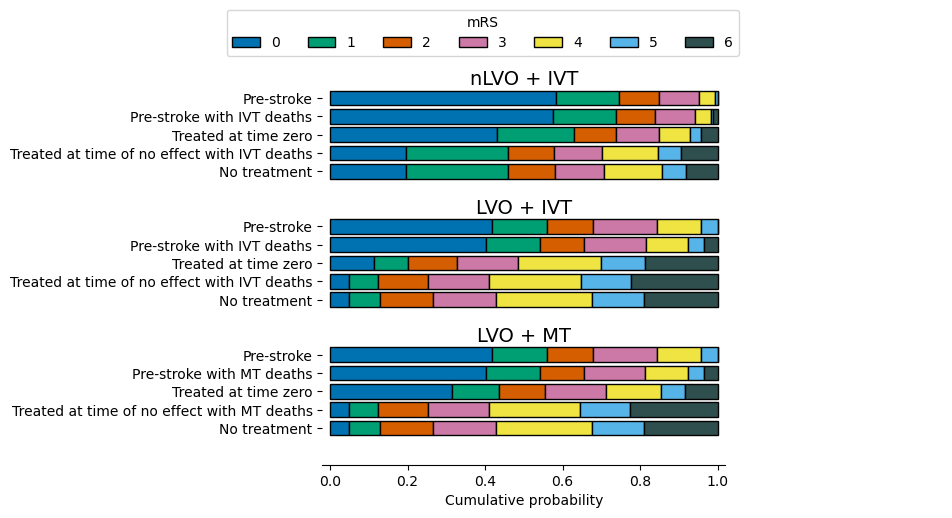

In [153]:
labels = [
    'Pre-stroke',
    'Pre-stroke with IVT deaths',
    'Treated at time zero',
    'Treated at time of no effect with IVT deaths',
    'No treatment',
    'Pre-stroke',
    'Pre-stroke with IVT deaths',
    'Treated at time zero',
    'Treated at time of no effect with IVT deaths',
    'No treatment',
    'Pre-stroke',
    'Pre-stroke with MT deaths',
    'Treated at time zero',
    'Treated at time of no effect with MT deaths',
    'No treatment',
]

fig, axs = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios':[3.0, 1.5], 'wspace':0.05})
plot_bars_and_means(axs, mrs_dists, labels)

plt.savefig('./input_mrs_dists.png', bbox_inches='tight')

## Example 10 patients

In [154]:
# Store the patient details in this dictionary:
example10_dict = dict(
    patient_labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    stroke_type_code=np.array([1, 1, 2, 1, 1, 2, 2, 1, 1, 0]),
    ivt_chosen_bool=(np.array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0]) == 1),
    onset_to_needle_mins=np.array([180, 90, 240, np.NaN, np.NaN, np.NaN, np.NaN, 300, 300, np.NaN]),
    mt_chosen_bool=(np.array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]) == 1),
    onset_to_puncture_mins=np.array([np.NaN, np.NaN, 270, np.NaN, np.NaN, np.NaN, 300, np.NaN, 320, np.NaN]),
    mrs_pre_stroke=np.array([0, 3, 2, 1, 2, 0, 0, 1, 1, 2])
)

The following dictionary stores the same data but formatted to be printed more nicely.

In [155]:
example10_pretty_dict = {
    'Patient': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Stroke type': ['nLVO', 'nLVO', 'LVO', 'nLVO', 'nLVO', 
                    'LVO', 'LVO', 'nLVO', 'nLVO', 'Other'],
    'Treated with IVT': ['Yes', 'Yes', 'Yes', 'No', 'No', 
                         'No', 'No', 'Yes', 'Yes', 'No'],
    'Onset to IVT time (minutes)': ['180', '90', '240', '-', '-', 
                                    '-', '-', '300', '300', '-'],
    'Treated with MT': ['No', 'No', 'Yes', 'No', 'No', 
                        'No', 'Yes', 'No', 'Yes', 'No'],
    'Onset to MT time (minutes)': ['-', '-', '270', '-', '-', 
                                   '-', '300', '-', '320', '-'],
    'mRS score pre-stroke': [0, 3, 2, 1, 2, 0, 0, 1, 1, 2]
}

Show the same data in a DataFrame so it's easier to read:

In [156]:
# Pop them into a dataframe:
example10_df = pd.DataFrame(
    np.array(list(example10_pretty_dict.values()), dtype=object).T,
    columns=example10_pretty_dict.keys()
)
example10_df = example10_df.set_index('Patient')

example10_df

,Stroke type,Treated with IVT,Onset to IVT time (minutes),Treated with MT,Onset to MT time (minutes),mRS score pre-stroke
Patient,,,,,,
A,nLVO,Yes,180,No,-,0
B,nLVO,Yes,90,No,-,3
C,LVO,Yes,240,Yes,270,2
D,nLVO,No,-,No,-,1
E,nLVO,No,-,No,-,2
F,LVO,No,-,No,-,0
G,LVO,No,-,Yes,300,0
H,nLVO,Yes,300,No,-,1
I,nLVO,Yes,300,Yes,320,1


In [157]:
# Save to file:
example10_df.to_csv('example10_patients_mrs.csv')

In [158]:
example10_df = pd.read_csv('example10_patients_mrs.csv', index_col='Patient')

example10_df

,Stroke type,Treated with IVT,Onset to IVT time (minutes),Treated with MT,Onset to MT time (minutes),mRS score pre-stroke
Patient,,,,,,
A,nLVO,Yes,180,No,-,0
B,nLVO,Yes,90,No,-,3
C,LVO,Yes,240,Yes,270,2
D,nLVO,No,-,No,-,1
E,nLVO,No,-,No,-,2
F,LVO,No,-,No,-,0
G,LVO,No,-,Yes,300,0
H,nLVO,Yes,300,No,-,1
I,nLVO,Yes,300,Yes,320,1


## Patient grid

In [159]:
def draw_stick_figure(ax, x_cent, y_cent, x_size, y_size, text=''):
    f = './stick-figure_light-grey.png'
    image_data = plt.imread(f)
    
    left = x_cent - x_size * 0.5
    right = x_cent + x_size * 0.5
    top = y_cent + y_size * 0.5
    bottom = y_cent - y_size * 0.5
    
    ax.imshow(image_data, extent=[left, right, bottom, top])
    
    if len(text) > 0:
        # Annotate a label
        ax.annotate(text, xy=(x_cent, y_cent), color='k', ha='center', va='center', fontweight='bold')
    

In [160]:
def add_stick_figure(ax, text_for_figure, stroke_type, treatment, n_figures_in_grid, width=2, height=4, cell_height=6, cell_width=6, loc_dict={}):


    if stroke_type in ['nLVO', 'nlvo', 1]:
        row = loc_dict['row_nlvo']
    elif stroke_type in ['LVO', 'lvo', 2]:
        row = loc_dict['row_lvo']
    else:
        row = loc_dict['row_other']
    
    if treatment in ['IVT', 'ivt']:
        col = loc_dict['col_ivt']
    elif treatment in ['IVT+MT', 'ivt+mt']:
        col = loc_dict['col_ivt_mt']
    elif treatment in ['MT', 'mt']:
        col = loc_dict['col_mt']
    else:
        col = loc_dict['col_none']

    n_in_cell = n_figures_in_grid[col, row]

    x_cent = (col * cell_width) + (n_in_cell + 0.5) * width
    y_cent = (-row - 0.5) * cell_height
    
    draw_stick_figure(ax, x_cent, y_cent, width, height, text_for_figure)
    n_figures_in_grid[col, row] += 1
        
    return n_figures_in_grid

In [161]:
def plot_patient_grid(ax, example10_dict):
    row_nlvo = 0
    row_lvo = 1
    row_other = 2

    col_ivt = 0
    col_ivt_mt = 1
    col_mt = 2
    col_none = 3
    
    loc_dict = dict(
        row_nlvo=row_nlvo,
        row_lvo=row_lvo,
        row_other=row_other,
        col_ivt=col_ivt,
        col_ivt_mt=col_ivt_mt,
        col_mt=col_mt,
        col_none=col_none
        )

    n_figures_in_grid = np.full((4, 3), 0)

    width = 2
    height = 4

    cell_height = 6
    cell_width = 6


    for c in np.arange(5) * cell_width:
        ax.vlines(c, -18, 0, color='k')
    for r in -np.arange(4) * cell_height:
        ax.hlines(r, 0, 24, color='k')

    ax.set_xticks((np.array([0, 1, 2, 3]) + 0.5) * (cell_width))
    ax.set_xticklabels(['IVT', 'IVT\n+MT', 'MT', 'No\ntreatment'])
    ax.set_yticks((np.array([0, 1, 2]) + 0.5) * (-cell_height))
    ax.set_yticklabels(['nLVO', 'LVO', 'other'])

    for p, patient_label in enumerate(example10_dict['patient_labels']):
        if (example10_dict['ivt_chosen_bool'][p] > 0) & (example10_dict['mt_chosen_bool'][p] > 0):
            treatment_str = 'IVT+MT'
        elif example10_dict['ivt_chosen_bool'][p] > 0:
            treatment_str = 'IVT'
        elif example10_dict['mt_chosen_bool'][p] > 0:
            treatment_str = 'MT'
        else:
            treatment_str = 'none'
        n_figures_in_grid = add_stick_figure(
            ax,
            patient_label, 
            example10_dict['stroke_type_code'][p], 
            treatment_str, 
            n_figures_in_grid,
            width,
            height,
            cell_height,
            cell_width,
            loc_dict
            )

    ax.set_xlim(-0.05, 24)
    ax.set_ylim(-18, 0.05)

    ax.xaxis.tick_top()
    for spine in ['top', 'bottom', 'right', 'left']:
        ax.spines[spine].set_visible(False)


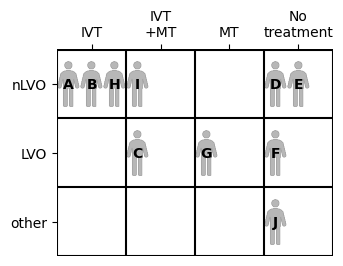

In [162]:
fig, ax = plt.subplots(figsize=(5, 3), gridspec_kw={'top':0.8})
plot_patient_grid(ax, example10_dict)
plt.savefig('example_patient_grid.png')

## Probability vs time

In [163]:
from stroke_outcome.discrete_outcome import Discrete_outcome
import copy

In [164]:
n_total = 101

times_to_plot = np.linspace(0.0, ivt_time_no_effect_mins, n_total)

# Store the patient details in this dictionary:
outcome_inputs_dict = dict(
    stroke_type_code=np.array([1]*n_total),
    onset_to_needle_mins=times_to_plot,
    ivt_chosen_bool=np.array([True] * n_total),
    onset_to_puncture_mins=np.linspace(0.0, mt_time_no_effect_mins, n_total),
    mt_chosen_bool=np.array([False] * n_total)
)

In [165]:
discrete_outcome = Discrete_outcome(
    input_mrs_dists,
    n_total,
    utility_weights,
)

# Import patient array data into a dictionary called "trial".
for key in discrete_outcome.trial.keys():
    if key in outcome_inputs_dict:
        discrete_outcome.trial[key].data = copy.copy(outcome_inputs_dict[key])

# Calculate outcomes:
outcomes_by_stroke_type, full_cohort_outcomes = (
    discrete_outcome.calculate_outcomes())

        
# Make a copy of the results:
outcomes_by_stroke_type_times = copy.copy(outcomes_by_stroke_type)
full_cohort_outcomes_times = copy.copy(full_cohort_outcomes)

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [166]:
def do_probs_with_time_matplotlib(
        time_no_effect, A_list, b_list, colour_list, treatment_times,
        treatment_labels=[], time_no_effect_mt=8*60
        ):
    # --- Plot probability with time -----
    times_to_plot = np.linspace(0, time_no_effect, 20)
    # figsize is fudged to make it approx. same height as other plot
    fig_probs_time, ax_probs_time = plt.subplots(figsize=(8, 4))
    plot_probs_filled(
        A_list, b_list, times_to_plot, colour_list,
        # probs_to_mark=np.unique(probs_to_mark),
        treatment_times, treatment_labels,
        ax=ax_probs_time, xmax=time_no_effect_mt/60)
    #st.pyplot(fig_probs_time)
    


def plot_probs_filled(
        probs_lists,
        times_mins,
        colour_list=[],
        treatment_times=[],
        treatment_labels=[],
        ax=None,
        title='',
        xmax=None
        ):
    if ax is None:
        ax = plt.subplot()
    # P(mRS<=5)=1.0 at all times, so it has no defined A, a, and b.
    # Instead append to this array a 0.0, which won't be used directly
    # but will allow the "for" loop to go round one extra time.
    # A = np.append(A, 0.0)
    times_hours = times_mins/60.0

    # p_j = np.zeros(times_mins.shape)
    # for i, A_i in enumerate(A):
    for i, p_i in enumerate(probs_lists):
        if len(colour_list) > 0:
            colour = colour_list[i]
        else:
            colour = None
        # # Define the probability line, p_i:
        # if i < 6:
        #     p_i = 1.0/(1.0 + np.exp(-A_i - b[i]*times_mins))
        # else:
        #     # P(mRS<=5)=1.0 at all times:
        #     p_i = np.full(times_mins.shape, 1.0)

        # Plot it as before and store the colour used:
        ax.plot(times_hours, p_i, color='k', linewidth=1)
        # Fill the area between p_i and the line below, p_j.
        # This area marks where mRS <= the given value.
        # If p_j is not defined yet (i=0), set all p_j to zero:
        p_j = p_j if i > 0 else np.zeros_like(p_i)
        ax.fill_between(times_hours, p_i, p_j, label=f'{i}',
                        color=colour)

        # Store the most recently-created line for the next loop:
        p_j = p_i

    if len(treatment_times) > 0:
        if len(treatment_labels) != len(treatment_times):
            treatment_labels = ['Treatment' for t in treatment_times]
        for i, time_input in enumerate(treatment_times):
            ax.axvline(time_input/60.0, color='k', linestyle=':')
            ax.annotate(
                '|',
                xy=(time_input/60.0, 0.95),
                va='bottom', ha='center', color='r',
                fontsize=20, zorder=0
                )
            ax.annotate(
                treatment_labels[i]+'\n',
                xy=(time_input/60.0, 1.0),
                va='bottom', ha='left', color='r',
                rotation=30
                )

    ax.set_ylabel('Probability')
    ax.set_xlabel('Onset to treatment time (hours)')

    ax.set_ylim(0, 1)

    if xmax is None:
        xmax = times_hours[-1]

    # Secret annotation to make sure axis doesn't resize when time input
    # is equal to max time:
    ax.annotate('Treatment',
                xy=(xmax, 0.0), va='top', ha='center', color='None')

    ax.set_xlim(times_hours[0], xmax)

    ax.set_xticks(np.arange(times_hours[0], xmax+0.01, 1))
    ax.set_xticks(np.arange(times_hours[0], xmax+0.01, 0.25), minor=True)

    ax.set_yticks(np.arange(0, 1.01, 0.25))
    ax.set_yticks(np.arange(0, 1.01, 0.05), minor=True)
    ax.tick_params(top=True, bottom=True, left=True, right=True, which='both')

    ax.set_title(title)

## Get dists at times

In [167]:
# Pick a seed where the x scores aren't too close together
# to display nicely on the figures.
np.random.seed(42 + 42 + 42 + 42 + 42)

discrete_outcome = Discrete_outcome(
    input_mrs_dists,
    10,
    utility_weights,
)

# Import patient array data into a dictionary called "trial".
for key in discrete_outcome.trial.keys():
    if key in example10_dict:
        discrete_outcome.trial[key].data = copy.copy(example10_dict[key])

# Calculate outcomes:
outcomes_by_stroke_type, full_cohort_outcomes = (
    discrete_outcome.calculate_outcomes())

        
# Make a copy of the results:
outcomes_by_stroke_type_example10 = copy.copy(outcomes_by_stroke_type)
full_cohort_outcomes_example10 = copy.copy(full_cohort_outcomes)

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [197]:
x_scores_example10 = discrete_outcome.trial['x_pre_stroke'].data

x_scores_example10

array([0.05824392, 0.86037857, 0.60803706, 0.63210532, 0.79759216,
       0.04281209, 0.36142422, 0.71015798, 0.54113744, 0.        ])

In [169]:
def plot_mrs_dist(ax, dist, y, width=0.8):
    
    if (len(dist) > 0) & (np.all(np.isnan(dist)) == False):
        cum_vals = np.append(0.0, dist)
        vals = np.diff(cum_vals)

        for v in range(len(vals)):
            ax.bar(
                y,
                vals[v],
                color=colour_list[v],
                edgecolor='k',
                bottom=cum_vals[v],
                # height=0.4,
                width=width
                )
    else:
        ax.bar(
            y,
            1.0,
            color='w',
            edgecolor='k',
            width=width
            )

In [170]:
def plot_dists_no_effect_treatment(ax, treatment_str):
    plot_mrs_dist(ax, input_mrs_dists.loc['no_effect_' + treatment_str + '_deaths'], 0)
    plot_mrs_dist(ax, input_mrs_dists.loc['no_treatment_' + treatment_str.split('_')[0]], 2)

    ax.set_xlim(-1, 3)
    ax.set_xticks([0.0, 2.0])
    ax.set_xticklabels(['No\neffect', 'No\ntreatment'])
    ax.xaxis.tick_top()
    
    # ax.set_ylabel('Probability')
    ax.set_yticks([])
    # ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.25))
    # ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.05), minor=True)
    ax.set_ylim(-0.01, 1.01)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

def plot_values_no_effect_treatment(ax, treatment_str):
    m = input_mrs_dist_means['mean_mrs_no_effect_' + treatment_str + '_deaths']
    u = input_mrs_dist_means['mean_utility_no_effect_' + treatment_str + '_deaths']
    
    label_mean_mrs = f"{m:.2f}"
    label_mean_utility = f"{u:.3f}"
    ax.annotate(label_mean_mrs, xy=(0, -0.1), ha='center', va='center')
    ax.annotate(label_mean_utility, xy=(0, -0.3), ha='center', va='center')

    m = input_mrs_dist_means['mean_mrs_no_treatment_' + treatment_str.split('_')[0]]
    u = input_mrs_dist_means['mean_utility_no_treatment_' + treatment_str.split('_')[0]]
    
    label_mean_mrs = f"{m:.2f}"
    label_mean_utility = f"{u:.3f}"
    ax.annotate(label_mean_mrs, xy=(1, -0.1), ha='center', va='center')
    ax.annotate(label_mean_utility, xy=(1, -0.3), ha='center', va='center')

    ax.set_xticks([])
    ax.set_yticks([-0.1, -0.3])
    ax.set_yticklabels(['Mean mRS', 'Mean utility'])
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.4, 0.0)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

    

### "x" factor demo

In [171]:
def plot_dists_time_zero_no_treatment(ax, treatment_str):
    plot_mrs_dist(ax, input_mrs_dists.loc['t0_treatment_' + treatment_str], 0)
    plot_mrs_dist(ax, input_mrs_dists.loc['no_treatment_' + treatment_str.split('_')[0]], 3)

    ax.set_xlim(-0.5, 3.5)
    ax.set_xticks([0.0, 3.0])
    ax.set_xticklabels(['Treatment at\ntime zero', 'No\ntreatment'])
    ax.xaxis.tick_top()
    
    ax.set_ylabel('Probability')
    # ax.set_yticks([])
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.25))
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.05), minor=True)
    ax.set_ylim(-0.01, 1.01)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

In [172]:
def plot_values_time_zero_no_treatment(ax, x_score, mRS_values, mRS_shift, utility_values, utility_shift, label_x=[], label_y=[]):

    for l, label in enumerate(mRS_values):
        ax.annotate(label, xy=(label_x[l], label_y[l]), ha='center', va='center')
        ax.annotate(utility_values[l], xy=(label_x[l], label_y[l]-2), ha='center', va='center')
    
    ax.annotate(mRS_shift, xy=(np.mean(label_x), label_y[0]-0.5), ha='center', va='center')
    ax.annotate(f'{utility_shift:+.2f}', xy=(np.mean(label_x), label_y[0]-2.5), ha='center', va='center')
    
    for y_shift in [0, -2]:
        ax.annotate('', xy=(label_x[0]+0.4, label_y[0]+y_shift), xytext=(label_x[1]-0.4, label_y[1]+y_shift),
                    arrowprops=dict(color='k', arrowstyle='->'))
    
    ax.set_xticks([])
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

In [173]:
def plot_x_line(
        ax, x_score, labels=[''], 
        line_left=np.NaN, line_right=np.NaN,
        marker_x=[np.NaN], marker_y=[np.NaN], 
        label_x=[np.NaN], label_y=[np.NaN], 
        colour='#b7b7b7'
        ):
    ax.hlines(x_score, xmin=line_left, xmax=line_right, color=colour, zorder=0, linestyle=':')
    ax.scatter(marker_x, marker_y, color=colour, marker='>', zorder=0)
    for l, label in enumerate(labels):
        ax.annotate(labels[l], xy=(label_x[l], label_y[l]), ha='center', va='center')

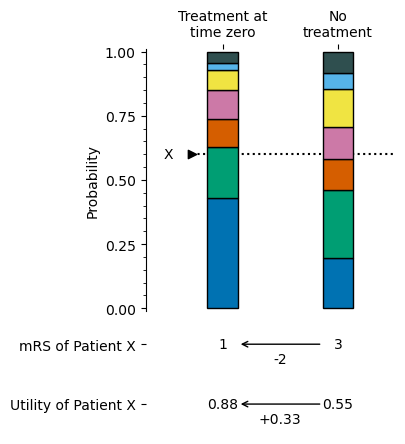

In [174]:
treatment_str = 'nlvo_ivt'

x_scores = np.array([0.6])
labels = ['X']

fig, axs = plt.subplots(
    2, 1, figsize=(5, 5), 
    gridspec_kw={'height_ratios':[1, 0.4], 'hspace':0.1, 'left':0.4}
)
ax = axs[0]
plot_dists_time_zero_no_treatment(ax, treatment_str)
plot_x_line(ax, x_scores, labels=labels, 
            line_left=-0.8, line_right=4.5,
            marker_x=np.full(x_scores.shape, -0.8), marker_y=x_scores, colour='k', 
            label_x=np.full(x_scores.shape, -1.4), label_y=x_scores)

plot_values_time_zero_no_treatment(
    axs[1], x_scores, mRS_values=[1, 3], mRS_shift=-2, 
    utility_values=[utility_weights[1], utility_weights[3]], 
    utility_shift=utility_weights[1] - utility_weights[3], 
    label_x=[0.0, 3.0], label_y=[0.0, 0.0]
)
ax.set_xlim(-2, 4.5)
axs[1].set_xlim(-2, 4.5)
axs[1].set_ylim(-3, 0.5)
axs[1].set_yticks([0, -2])
axs[1].set_yticklabels([f'mRS of Patient {labels[0]}', 
                        f'Utility of Patient {labels[0]}'])
plt.savefig('./x_factor_example.png')
plt.show()

### "x" factor with probs with time

In [175]:
def plot_dist_pre_stroke(ax):
    plot_mrs_dist(ax, input_mrs_dists.loc['pre_stroke_nlvo'], 0)

    ax.set_xlim(-1.8, 1.)
    ax.set_xticks([0.0])
    ax.set_xticklabels(['nLVO\nPre-stroke'])
    ax.xaxis.tick_top()
    
    ax.set_ylabel('Probability')
    # ax.set_yticks([])
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.25))
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.05), minor=True)
    ax.set_ylim(-0.01, 1.01)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

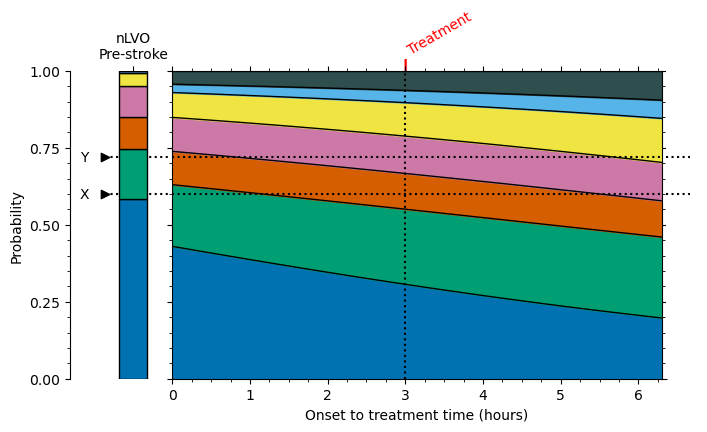

In [176]:

x_scores = np.array([0.6, 0.72])
labels = ['X', 'Y']

fig, axs = plt.subplots(
    1, 3, figsize=(8, 4), 
    gridspec_kw={'width_ratios':[0.2, 1.0, 0.05], 'wspace':0.02}
    )

ax_pre_stroke = axs[0]
ax_probs_vs_time = axs[1]
ax_rhs = axs[2]

plot_dist_pre_stroke(ax_pre_stroke)

# --- Plot probability with time -----
probs_lists = outcomes_by_stroke_type_times[treatment_str + '_each_patient_mrs_dist_post_stroke'].T

plot_probs_filled(
    probs_lists, times_to_plot, colour_list,
    # probs_to_mark=np.unique(probs_to_mark),
    treatment_times=[3*60], treatment_labels=['Treatment'],
    ax=ax_probs_vs_time, xmax=ivt_time_no_effect_mins/60)


plot_x_line(ax_pre_stroke, x_scores, labels=labels, 
            line_left=-0.8, line_right=4.5,
            marker_x=np.full(x_scores.shape, -0.8), marker_y=x_scores, colour='k', 
            label_x=np.full(x_scores.shape, -1.4), label_y=x_scores)

for x in x_scores:
    ax_rhs.axhline(x, linestyle=':', color='k')
    ax_probs_vs_time.axhline(x, linestyle=':', color='k')
for spine in ['top', 'bottom', 'left', 'right']:
    ax_rhs.spines[spine].set_visible(False)
ax_rhs.set_xticks([])
ax_rhs.set_yticks([])


ax_pre_stroke.set_ylim(ax_probs_vs_time.get_ylim())
ax_rhs.set_ylim(ax_probs_vs_time.get_ylim())

ax_probs_vs_time.set_yticklabels([])
ax_probs_vs_time.set_ylabel('')

plt.savefig('./x_factor_with_time.png', bbox_inches='tight')

### All patient's "x" factors and pre-stroke mRS dists

In [177]:
def plot_dists_both_pre_stroke(ax):
    plot_mrs_dist(ax, input_mrs_dists.loc['pre_stroke_nlvo'], 0)
    plot_mrs_dist(ax, input_mrs_dists.loc['pre_stroke_lvo'], 3)

    ax.set_xlim(-0.5, 3.5)
    ax.set_xticks([0.0, 3.0])
    ax.set_xticklabels(['nLVO\nPre-stroke', 'LVO\nPre-stroke'])
    ax.xaxis.tick_top()
    
    ax.set_ylabel('Probability')
    # ax.set_yticks([])
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.25))
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.05), minor=True)
    ax.set_ylim(-0.01, 1.01)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

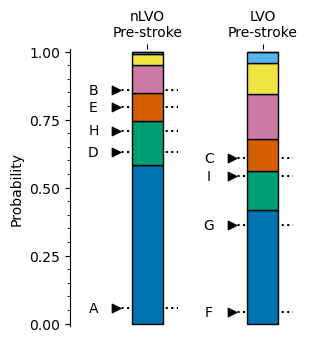

In [178]:

x_scores = np.array(x_scores_example10)
labels = np.array(example10_dict['patient_labels'])

inds_nlvo = np.where((example10_dict['stroke_type_code'] == 1) & (labels != 'I'))[0]
inds_lvo = np.where((example10_dict['stroke_type_code'] == 2) | (labels == 'I'))[0]



fig, ax = plt.subplots(
    figsize=(5, 3.6), 
    gridspec_kw={'left':0.4}
)

plot_dists_both_pre_stroke(ax)

for i, inds in enumerate([inds_nlvo, inds_lvo]):
    if i == 0:
        # nLVO
        line_left =-0.8
        line_right=0.8
    else:
        line_left = 2.2
        line_right = 3.8
        
    plot_x_line(
        ax, x_scores[inds], labels=labels[inds], 
        line_left=line_left, line_right=line_right,
        marker_x=np.full(x_scores[inds].shape, line_left), marker_y=x_scores[inds], colour='k', 
        label_x=np.full(x_scores[inds].shape, line_left - 0.6), label_y=x_scores[inds]
    )

ax.set_xlim(-2, 4.5)

plt.savefig('./x_factor_example10.png')
plt.show()

### Each patient results

In [179]:
def plot_each_patient_dists(ax, treatment_str, patient_labels, use_full_cohort=False, width=0.8):

    for p, patient_label in enumerate(patient_labels):
        if use_full_cohort:
            dist = full_cohort_outcomes_example10[
                'each_patient_mrs_dist_post_stroke'][p]
        else:
            dist = outcomes_by_stroke_type_example10[
                treatment_str + '_each_patient_mrs_dist_post_stroke'][p]
            full_cohort_outcomes_example10
        plot_mrs_dist(ax, dist, p, width=width)

    ax.set_xlim(-0.5, len(patient_labels)-0.5)
    ax.set_xticks(np.arange(len(patient_labels)))
    ax.set_xticklabels(patient_labels)
    ax.xaxis.tick_top()
    
    ax.set_ylabel('Probability')
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.25))
    ax.set_yticks(np.arange(0.0, 1.0+1e-7, 0.05), minor=True)
    ax.set_ylim(-0.01, 1.01)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)


def plot_each_patient_values(ax, treatment_str, use_full_cohort=False):
    
    prepend_str = treatment_str + '_' if len(treatment_str) > 0 else ''
    if use_full_cohort:
        outcomes_dict = full_cohort_outcomes_example10
    else:
        outcomes_dict = outcomes_by_stroke_type_example10
    
    n_patients = len(outcomes_dict[
            prepend_str + 'each_patient_mrs_post_stroke'])
    for p in range(n_patients):
        mean_mrs = outcomes_dict[
            prepend_str + 'each_patient_mrs_post_stroke'][p]
        mean_mrs_not_treated = outcomes_dict[
            prepend_str + 'each_patient_mrs_not_treated'][p]
        mean_mrs_shift = outcomes_dict[
            prepend_str + 'each_patient_mrs_shift'][p]
        mean_utility = outcomes_dict[
            prepend_str + 'each_patient_utility_post_stroke'][p]
        mean_utility_not_treated = outcomes_dict[
            prepend_str + 'each_patient_utility_not_treated'][p]
        mean_utility_shift = outcomes_dict[
            prepend_str + 'each_patient_utility_shift'][p]

        vals = [mean_mrs, mean_mrs_not_treated, mean_mrs_shift, mean_utility, mean_utility_not_treated, mean_utility_shift]
        if np.any(np.isnan(vals)):
            label_mean_mrs = '-'
            label_mean_mrs_not_treated = '-'
            label_mean_mrs_shift = '-'
            label_mean_utility = '-'
            label_mean_utility_not_treated = '-'
            label_mean_utility_shift = '-'
        else:
            label_mean_mrs = f"{mean_mrs:.0f}"
            label_mean_mrs_not_treated = f"{mean_mrs_not_treated:.0f}"
            label_mean_mrs_shift = f"{mean_mrs_shift:.0f}"
            label_mean_utility = f"{mean_utility:.2f}"
            label_mean_utility_not_treated = f"{mean_utility_not_treated:.2f}"
            label_mean_utility_shift = f"{mean_utility_shift:.2f}"

        ax.annotate(label_mean_mrs, xy=(p, -0.1), 
                    ha='center', va='center')
        ax.annotate(label_mean_mrs_not_treated, xy=(p, -0.2), 
                    ha='center', va='center')
        ax.annotate(label_mean_mrs_shift, xy=(p, -0.3), 
                    ha='center', va='center')
        ax.annotate(label_mean_utility, xy=(p, -0.5), 
                    ha='center', va='center')
        ax.annotate(label_mean_utility_not_treated, xy=(p, -0.6), 
                    ha='center', va='center')
        ax.annotate(label_mean_utility_shift, xy=(p, -0.7), 
                    ha='center', va='center')

    ax.set_xticks([])
    ax.set_yticks([-0.1, -0.2, -0.3, -0.5, -0.6, -0.7])
    ax.set_yticklabels(['mRS', 'mRS not treated', 'mRS shift', 
                        'Utility', 'Utility not treated', 'Utility shift'])

    ax.set_xlim(-0.5, len(patient_labels)-0.5)
    ax.set_xticks([])
    ax.set_ylim(-0.8, 0.0)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)


In [180]:
def plot_summary_values(ax, treatment_str):
    summary_labels = ['Valid\npatients', 'Treated\npatients', 'Improved\npatients']

    prepend_str = treatment_str + '_' if len(treatment_str) > 0 else ''
    outcomes_dict = outcomes_by_stroke_type_example10        
    mrs_vals = [
        outcomes_dict[
            prepend_str + 'valid_patients_mean_mrs_post_stroke'],
        outcomes_dict[
            prepend_str + 'treated_patients_mean_mrs_post_stroke'],
        outcomes_dict[
            prepend_str + 'improved_patients_mean_mrs_post_stroke'],
        ]    
    mrs_not_treated_vals = [
        f"{outcomes_dict[prepend_str + 'valid_patients_mean_mrs_not_treated']:.1f}",
        '-',
        '-'
    ]
    mrs_shifts = [
        outcomes_dict[
            prepend_str + 'valid_patients_mean_mrs_shift'],
        outcomes_dict[
            prepend_str + 'treated_patients_mean_mrs_shift'],
        outcomes_dict[
            prepend_str + 'improved_patients_mean_mrs_shift'],
        ]
    util_vals = [
        outcomes_dict[
            prepend_str + 'valid_patients_mean_utility_post_stroke'],
        outcomes_dict[
            prepend_str + 'treated_patients_mean_utility_post_stroke'],
        outcomes_dict[
            prepend_str + 'improved_patients_mean_utility_post_stroke'],
        ]    
    util_not_treated_vals = [
        f"{outcomes_dict[prepend_str + 'valid_patients_mean_utility_not_treated']:.3f}",
        '-',
        '-'
    ]
    util_shifts = [
        outcomes_dict[
            prepend_str + 'valid_patients_mean_utility_shift'],
        outcomes_dict[
            prepend_str + 'treated_patients_mean_utility_shift'],
        outcomes_dict[
            prepend_str + 'improved_patients_mean_utility_shift'],
        ]
    
    for p, summary_label in enumerate(summary_labels):

        mean_mrs = mrs_vals[p]
        mean_mrs_shift = mrs_shifts[p]
        mean_utility = util_vals[p]
        mean_utility_shift = util_shifts[p]

        if np.any(np.isnan([mean_mrs, mean_mrs_shift, mean_utility, mean_utility_shift])):
            label_mean_mrs = '-'
            label_mean_mrs_shift = '-'
            label_mean_utility = '-'
            label_mean_utility_shift = '-'
        else:
            label_mean_mrs = f"{mean_mrs:.1f}"
            label_mean_mrs_shift = f"{mean_mrs_shift:.1f}"
            label_mean_utility = f"{mean_utility:.3f}"
            label_mean_utility_shift = f"{mean_utility_shift:.3f}"
            
        label_mean_mrs_not_treated = mrs_not_treated_vals[p]
        label_mean_utility_not_treated = util_not_treated_vals[p]

        ax.annotate(label_mean_mrs, xy=(p, -0.1), ha='center', va='center')
        ax.annotate(label_mean_mrs_not_treated, xy=(p, -0.2), ha='center', va='center')
        ax.annotate(label_mean_mrs_shift, xy=(p, -0.3), 
                    ha='center', va='center')
        ax.annotate(label_mean_utility, xy=(p, -0.5), ha='center', va='center')
        ax.annotate(label_mean_utility_not_treated, xy=(p, -0.6), ha='center', va='center')
        ax.annotate(label_mean_utility_shift, xy=(p, -0.7), 
                    ha='center', va='center')

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(summary_labels)
    ax.xaxis.tick_top()
    ax.set_xlim(-0.5, 2.5)

    ax.set_yticks([-0.1, -0.2, -0.3, -0.5, -0.6, -0.7])
    ax.set_yticklabels(['Mean mRS', 'Mean mRS not treated', 'Mean mRS shift', 
                        'Mean utility', 'Mean utility not treated', 'Mean utility shift'])
    ax.set_ylim(-0.8, 0.0)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)


In [181]:
def plot_summary_values_full_cohort(ax, treatment_str):
    summary_labels = ['Full\ncohort']

    prepend_str = treatment_str + '_' if len(treatment_str) > 0 else ''

    outcomes_dict = full_cohort_outcomes_example10        
    vals= [
        outcomes_dict[
            prepend_str + 'mean_mrs_post_stroke'],
        outcomes_dict[
            prepend_str + 'mean_mrs_not_treated'],
        outcomes_dict[
            prepend_str + 'mean_mrs_shift'],
        outcomes_dict[
            prepend_str + 'mean_utility'],
        outcomes_dict[
            prepend_str + 'mean_utility_not_treated'],
        outcomes_dict[
            prepend_str + 'mean_utility_shift'],
        ]

    mean_mrs = vals[0]
    mean_mrs_not_treated = vals[1]
    mean_mrs_shift = vals[2]
    mean_utility = vals[3]
    mean_utility_not_treated = vals[4]
    mean_utility_shift = vals[5]

    if np.any(np.isnan([mean_mrs, mean_mrs_shift, mean_utility, mean_utility_shift])):
        label_mean_mrs = '-'
        label_mean_mrs_not_treated = '-'
        label_mean_mrs_shift = '-'
        label_mean_utility = '-'
        label_mean_utility_not_treated = '-'
        label_mean_utility_shift = '-'
    else:
        label_mean_mrs = f"{mean_mrs:.1f}"
        label_mean_mrs_not_treated = f"{mean_mrs_not_treated:.1f}"
        label_mean_mrs_shift = f"{mean_mrs_shift:.1f}"
        label_mean_utility = f"{mean_utility:.3f}"
        label_mean_utility_not_treated = f"{mean_utility_not_treated:.3f}"
        label_mean_utility_shift = f"{mean_utility_shift:.3f}"

    ax.annotate(label_mean_mrs, xy=(0, -0.1), 
                ha='center', va='center')
    ax.annotate(label_mean_mrs_not_treated, xy=(0, -0.2), 
                ha='center', va='center')
    ax.annotate(label_mean_mrs_shift, xy=(0, -0.3), 
                ha='center', va='center')
    ax.annotate(label_mean_utility, xy=(0, -0.5), 
                ha='center', va='center')
    ax.annotate(label_mean_utility_not_treated, xy=(0, -0.6), 
                ha='center', va='center')
    ax.annotate(label_mean_utility_shift, xy=(0, -0.7), 
                ha='center', va='center')

    ax.set_xticks([0])
    ax.set_xticklabels(summary_labels)
    ax.xaxis.tick_top()
    ax.set_xlim(-0.5, 1.5)

    ax.set_yticks([-0.1, -0.2, -0.3, -0.5, -0.6, -0.7])
    ax.set_yticklabels(['Mean mRS', 'Mean mRS not treated', 'Mean mRS shift', 
                        'Mean utility', 'Mean utility not treated', 'Mean utility shift'])
    ax.set_ylim(-0.8, 0.0)

    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)


In [182]:
def plot_phantom_legend(ax):
    import matplotlib.patches as mpatches
    handles = []
    for i in range(6, -1, -1):
        patch = mpatches.Patch(color=colour_list[i], label=f'{i}')
        handles.append(patch)
    ax.legend(handles=handles, title='mRS')
    
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

In [183]:
from matplotlib.gridspec import GridSpec as gridspec

In [188]:
def draw_large_summary_image(treatment_str, treated_patients, treated_times, treated_labels, x_scores, x_labels):

    gs = gridspec(5, 7, wspace=0.05, width_ratios=[2, 0.8, 0.6, 1, 1.5, 1, 0.5], height_ratios=[1, 0.05, 0.3, 1, 0.8],
                 left=0.15, right=0.9, top=0.91, bottom=0.05)

    ax_patient_grid = plt.subplot(gs[0, 0])
    
    ax_dist_pre_stroke = plt.subplot(gs[0, 2])
    
    ax_probs_vs_time = plt.subplot(gs[0, 3:5])

    ax_dists_no_effect_treatment = plt.subplot(gs[0, 5])
    
    ax_legend = plt.subplot(gs[2:4, 4:])

    ax_dists_each_patient = plt.subplot(gs[3, 0:4])
    ax_values_each_patient = plt.subplot(gs[4, 0:4])

    ax_values_summary = plt.subplot(gs[4, 5:])


    plot_patient_grid(ax_patient_grid, example10_dict)


    plot_dist_pre_stroke(ax_dist_pre_stroke)
    plot_x_line(ax_dist_pre_stroke, x_scores, labels=x_labels, 
                line_left=-0.8, line_right=4.5,
                marker_x=np.full(x_scores.shape, -0.8), marker_y=x_scores, colour='k', 
                label_x=np.full(x_scores.shape, -1.4), label_y=x_scores)

    # --- Plot probability with time -----
    probs_lists = outcomes_by_stroke_type_times[treatment_str + '_each_patient_mrs_dist_post_stroke'].T

    plot_probs_filled(
        probs_lists, times_to_plot, colour_list,
        # probs_to_mark=np.unique(probs_to_mark),
        treatment_times=treated_times, treatment_labels=treated_labels,
        ax=ax_probs_vs_time, xmax=ivt_time_no_effect_mins/60)


    plot_dists_no_effect_treatment(ax_dists_no_effect_treatment, treatment_str)
    
    for i, x in enumerate(x_scores):
        ax_dists_no_effect_treatment.axhline(x, linestyle=':', color='k', zorder=0)
        if x_labels[i] in treated_labels:
            zorder = 4
        else:
            zorder = 0
        ax_probs_vs_time.axhline(x, linestyle=':', color='k', zorder=zorder)

    ax_probs_vs_time.set_ylabel('')
    ax_probs_vs_time.set_yticks([])
        
    plot_each_patient_dists(ax_dists_each_patient, treatment_str, example10_dict['patient_labels'], width=0.4)

    plot_each_patient_values(ax_values_each_patient, treatment_str)

    plot_summary_values(ax_values_summary, treatment_str)
    
    plot_phantom_legend(ax_legend)

    ax_dist_pre_stroke.set_ylim(ax_probs_vs_time.get_ylim())
    ax_dists_no_effect_treatment.set_ylim(ax_probs_vs_time.get_ylim())
    
    ax_patient_grid.set_title('Example patients')
    ax_probs_vs_time.set_title('mRS distributions with time\n\n')
    ax_dists_each_patient.set_title('Example patients\' post-stroke mRS distributions')

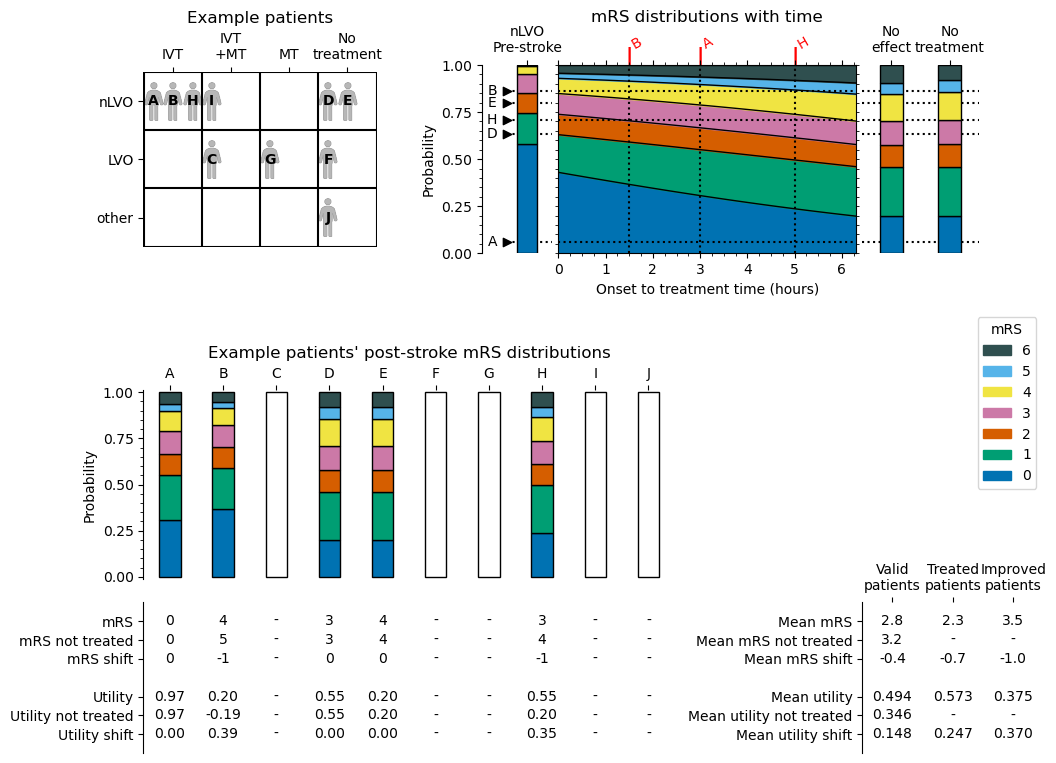

In [189]:
treatment_str = 'nlvo_ivt'

treated_patients = np.where(
    (example10_dict['ivt_chosen_bool']) & 
    (example10_dict['mt_chosen_bool'] == False) & 
    (example10_dict['stroke_type_code'] == 1)
    )[0]
treated_labels = np.array(example10_dict['patient_labels'])[treated_patients]
treated_times = np.array(example10_dict['onset_to_needle_mins'])[treated_patients]

valid_patients = np.where(
    (example10_dict['mt_chosen_bool'] == False) & 
    (example10_dict['stroke_type_code'] == 1)
    )[0]
x_scores = x_scores_example10[valid_patients]
x_labels = np.array(example10_dict['patient_labels'])[valid_patients]

fig = plt.figure(figsize=(12, 8))
draw_large_summary_image(treatment_str, treated_patients, treated_times, treated_labels, x_scores, x_labels)

plt.savefig('./discrete_nlvo_ivt_outcomes.png')#, bbox_inches='tight')
# plt.close()

In [194]:
def draw_combo_summary_image():
    
    gs = gridspec(5, 5, wspace=0.2, width_ratios=[1, 0.2, 1, 0.5, 0.5], height_ratios=[1, 0.2, 0.3, 1, 0.8],
                 left=0.15, right=0.9, top=0.91, bottom=0.05)

    ax_patient_grid = plt.subplot(gs[0, 0])
    
    # ax_pre_stroke = plt.subplot(gs[0, 2])

    
    ax_legend = plt.subplot(gs[2:4, 3:])

    ax_dists_each_patient = plt.subplot(gs[3, 0:3])
    ax_values_each_patient = plt.subplot(gs[4, 0:3])

    ax_values_summary = plt.subplot(gs[4, 4])

    treatment_str = ''
    plot_patient_grid(ax_patient_grid, example10_dict)

    plot_each_patient_dists(ax_dists_each_patient, treatment_str, example10_dict['patient_labels'], use_full_cohort=True, width=0.4)

    plot_each_patient_values(ax_values_each_patient, treatment_str, use_full_cohort=True)

    plot_summary_values_full_cohort(ax_values_summary, treatment_str)
    
    plot_phantom_legend(ax_legend)
    
    
    
    
    x_scores = np.array(x_scores_example10)
    labels = np.array(example10_dict['patient_labels'])

#     inds_nlvo = np.where((example10_dict['stroke_type_code'] == 1) & (labels != 'I'))[0]
#     inds_lvo = np.where((example10_dict['stroke_type_code'] == 2) | (labels == 'I'))[0]


#     plot_dists_both_pre_stroke(ax_pre_stroke)

#     for i, inds in enumerate([inds_nlvo, inds_lvo]):
#         if i == 0:
#             # nLVO
#             line_left =-0.8
#             line_right=0.8
#         else:
#             line_left = 2.2
#             line_right = 3.8

#         plot_x_line(
#             ax_pre_stroke, x_scores[inds], labels=labels[inds], 
#             line_left=line_left, line_right=line_right,
#             marker_x=np.full(x_scores[inds].shape, line_left), marker_y=x_scores[inds], colour='k', 
#             label_x=np.full(x_scores[inds].shape, line_left - 0.6), label_y=x_scores[inds]
#         )

#     ax_pre_stroke.set_xlim(-2, 4.5)
    
    # Plot markers on all post-stroke mRS dists:
    plot_x_line(
        ax_dists_each_patient, x_scores, labels=labels, 
        line_left=np.NaN, line_right=np.NaN,
        marker_x=np.arange(len(x_scores)) - 0.3, marker_y=x_scores, colour='k', 
        label_x=np.full(x_scores.shape, np.NaN), label_y=np.full(x_scores.shape, np.NaN)
        )

    ax_patient_grid.set_title('Example patients')
    ax_dists_each_patient.set_title('Example patients\' post-stroke mRS distributions')

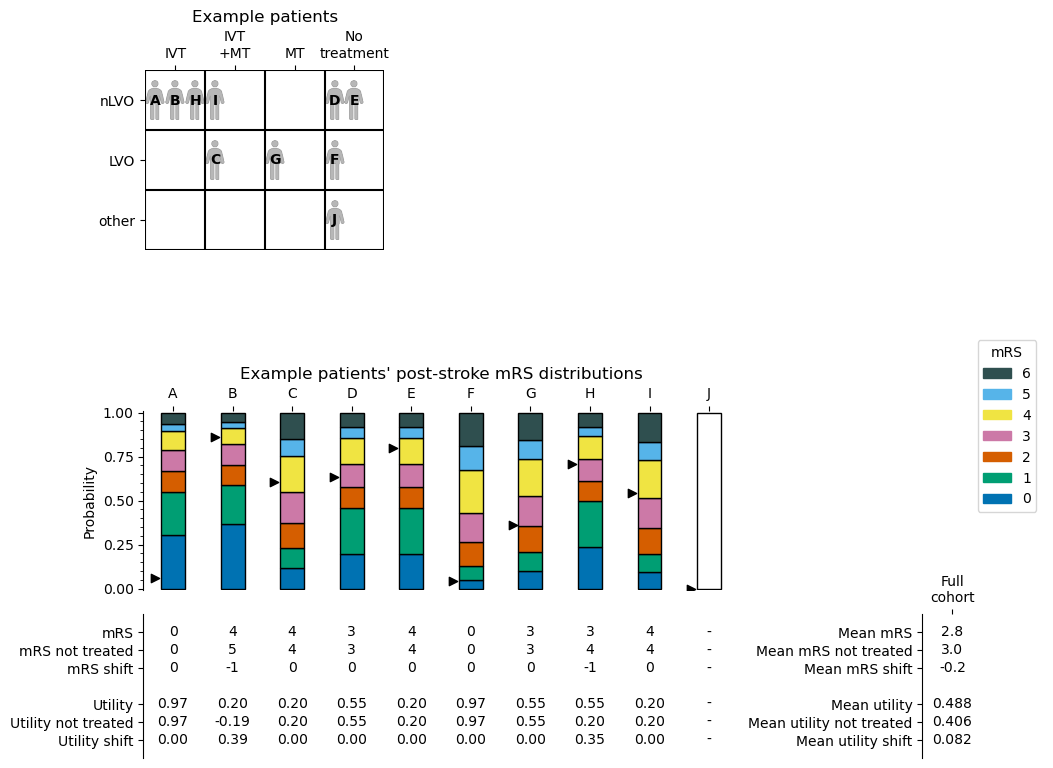

In [196]:
fig = plt.figure(figsize=(12, 8))
draw_combo_summary_image()
plt.savefig('./discrete_full_cohort_outcomes.png')